<a href="https://colab.research.google.com/github/JankowskaJ/Analysis-and-dashboards/blob/main/Trip_prices_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The project aims to create a model that will predict the price of a last-minute trip for two people. The model will be created based on data scraped from the websites of travel agencies ITAKA and Rainbow on July 13, 2025. The information obtained from these sites includes: destination, star rating - hotel rating, rating - average rating of trip, offer type (all inclusive, half board, etc.), price, date. The models that were trained in the project are: LinearRegression, RandomForestRegressor, XGBRegressor.

In [180]:
pip install requests beautifulsoup4 pandas apscheduler

In [181]:
# import libraries

import re
import requests
from bs4 import BeautifulSoup, Comment
import pandas as pd
import numpy as np
from datetime import datetime
from apscheduler.schedulers.blocking import BlockingScheduler

In [182]:
# Scrape the ITAKA website - the first 110 pages with last-minute offers. Offers for two people.

def scrape_itaka():
    itaka_url = "https://www.itaka.pl/last-minute/?participants%5B0%5D%5Badults%5D=2&page="
    data = []

    for page in range(1, 111):
        print(f"Scraping page {page}...")
        url = itaka_url + str(page)
        response = requests.get(url)

        if response.status_code != 200:
            print(f"Failed to retrieve page {page}, status code: {response.status_code}")
            continue

        soup = BeautifulSoup(response.content, "html.parser")

        # Find all offer containers
        offers = soup.find_all("div", class_="styles_c__f1i9i d-flex styles_c--enlarged-size__AJvYG")
        if not offers:
            print(f"No offers found on page {page} — maybe pagination ended early.")
            break

        for offer in offers:
            try:
                destination = offer.find("div", class_="styles_destination__tOoSF text-truncate").get_text(strip=True)
                star_rating = len(offer.find_all("i", class_="icon icon-shape-star"))
                rating_tag = offer.find("strong")
                rating = rating_tag.get_text(strip=True) if rating_tag else "N/A"
                offer_type = offer.select_one('span.c__children-omp84x div[class=""]').text.strip()
                price = offer.find("span", class_="current-price__value-Hy1Ehq").get_text(strip=True)
                date = offer.find("div", class_="styles_c__GqLxf").get_text(strip=True)

                data.append({
                    "source": "ITAKA",
                    "destination": destination,
                    "star rating": star_rating,
                    "rating": rating,
                    "offer type": offer_type,
                    "price": price,
                    "date": date
                })
            except Exception as e:
                print(f"Error parsing an offer on page {page}: {e}")
    return data

In [183]:
# Scrape the Rainbow website - the first 110 pages with last-minute offers. Offers for two people.

def scrape_rainbow():
    rainbow_url = "https://r.pl/last-minute?typTransportu=AIR&data&dorosli=1995-01-01&dorosli=1995-01-01&dzieci=nie&liczbaPokoi=1&dowolnaLiczbaPokoi=nie&dataWylotu&dlugoscPobytu=*-*&dlugoscPobytu.od=&dlugoscPobytu.do=&cena=avg&cena.od=&cena.do=&ocenaKlientow=*-*&promocja=last-minute&hotelUrl&produktUrl&sortowanie=termin-asc&strona="
    data = []

    for page in range(1, 111):
        print(f"Scraping page {page}...")
        url = rainbow_url + str(page)
        response = requests.get(url)

        if response.status_code != 200:
            print(f"Failed to retrieve page {page}, status code: {response.status_code}")
            continue

        soup = BeautifulSoup(response.content, "html.parser")

        # Find all offer containers
        offers = soup.find_all("a", class_="n-bloczek szukaj-bloczki__element")
        if not offers:
            print(f"No offers found on page {page} — maybe pagination ended early.")
            break

        for offer in offers:
            try:
              destination = offer.find("span", class_="r-typography r-typography--secondary r-typography--normal r-typography--black r-typography__caption r-typography--one-line-ellipsis r-typography--break-word r-bloczek-lokalizacja r-bloczek__body-lokalizacja").get_text(strip=True)
              star_rating_div = offer.find("div", class_="r-gwiazdki")
              star_rating = star_rating_div.get("data-rating") if star_rating_div else "Not available"
              rating = offer.find("div", class_="r-bloczek__chips").get_text(strip=True)
              offer_type = offer.find("span", class_="r-typography r-typography--secondary r-typography--normal r-typography--black r-typography__caption r-typography--break-word r-bloczek-wyzywienie__nazwa").get_text(strip=True)
              price = offer.find("span", class_="r-typography r-typography--main r-typography--bold r-typography--primary r-typography__h1 r-typography--break-word r-bloczek-cena__aktualna").get_text(strip=True)
              date = offer.find("div", class_="r-bloczek-wlasciwosci__dni").get_text(strip=True)

              # Append to data
              data.append({
                  "source": "Rainbow",
                  "destination": destination,
                  "star rating": star_rating,
                  "rating": rating,
                  "offer type": offer_type,
                  "price": price,
                  "date": date
              })
            except Exception as e:
                print(f"Error parsing an offer on page {page}: {e}")
    return data

In [184]:
# Union the data from ITAKA and Rainbow and create a one dataset.

def scrape_all():
    all_data = []
    all_data.extend(scrape_itaka())
    all_data.extend(scrape_rainbow())

    df = pd.DataFrame(all_data)
    df.to_csv("travel_offers.csv", mode='a', index=False, header=not pd.io.common.file_exists("travel_offers.csv"))
    print(f"Scraped data at {datetime.now()}")

In [185]:
scrape_all()

Scraping page 1...
Scraping page 2...
Scraping page 3...
Scraping page 4...
Scraping page 5...
Scraping page 6...
Scraping page 7...
Scraping page 8...
Scraping page 9...
Scraping page 10...
Scraping page 11...
Scraping page 12...
Scraping page 13...
Scraping page 14...
Scraping page 15...
Scraping page 16...
Scraping page 17...
Scraping page 18...
Scraping page 19...
Scraping page 20...
Scraping page 21...
Scraping page 22...
Scraping page 23...
Scraping page 24...
Scraping page 25...
Scraping page 26...
Scraping page 27...
Scraping page 28...
Scraping page 29...
Scraping page 30...
Scraping page 31...
Scraping page 32...
Scraping page 33...
Scraping page 34...
Scraping page 35...
Scraping page 36...
Scraping page 37...
Scraping page 38...
Scraping page 39...
Scraping page 40...
Scraping page 41...
Scraping page 42...
Scraping page 43...
Scraping page 44...
Scraping page 45...
Scraping page 46...
Scraping page 47...
Scraping page 48...
Scraping page 49...
Scraping page 50...
Scraping 

In [186]:
# Load the saved dataset

df = pd.read_csv('travel_offers.csv', on_bad_lines='skip')

In [187]:
df

,source,destination,star rating,rating,offer type,price,date
0,ITAKA,"Turcja,Kemer",5,3.8,17.07 - 21.07.2025 (5 dni)Kraków 18:10All incl...,2 299 zł,17.07-21.07.2025(5 dni)
1,ITAKA,"Bułgaria,Złote Piaski",4,4.7,29.07 - 1.08.2025 (4 dni)Warszawa-Okęcie 06:05...,2 199 zł,29.07-1.08.2025(4 dni)
2,ITAKA,Uzbekistan,0,5.0,13.08 - 23.08.2025 (11 dni)Warszawa-Okęcie 16:...,7 589 zł,13.08-23.08.2025(11 dni)
3,ITAKA,"Turcja,Finike",5,4.5,17.07 - 21.07.2025 (5 dni)Kraków 18:10All incl...,2 299 zł,17.07-21.07.2025(5 dni)
4,ITAKA,"Albania,Durres",5,5.0,31.07 - 3.08.2025 (4 dni)Kraków 13:10All inclu...,2 699 zł,31.07-3.08.2025(4 dni)
...,...,...,...,...,...,...,...
12528,Rainbow,Wypoczynek•Portugalia: Madera,5,5.3/6(3 oceny),Śniadania,11 429zł/os.,23.08.2025 (8 dni / 7 noclegów)inne terminy
12529,Rainbow,Objazd•Stany Zjednoczone i Bahamy,Not available,NaN,3 posiłki,15 947zł/os.,23.08.2025 (9 dni / 7 noclegów)inne terminy
12530,Rainbow,Objazd + wypoczynek•Mauritius,Not available,5.3/6(117 ocen),2 posiłki,18 289zł/os.,23.08.2025 (17 dni / 14 noclegów)inne terminy
12531,Rainbow,Objazd + wypoczynek•Mauritius,Not available,5.4/6(107 ocen),2 posiłki,18 918zł/os.,23.08.2025 (17 dni / 14 noclegów)inne terminy


In [188]:
# Clear the column "destination_cleaned" by removing unnecessary content

df['destination_cleaned'] = [re.sub(f'Wypoczynek•', '', str) for str in df['destination']]
df['destination_cleaned'] = [re.sub(f'Objazd•', '', str) for str in df['destination_cleaned']]
df['destination_cleaned'] = df['destination_cleaned'].str.replace('Objazd + wypoczynek•', '', regex=False)

In [189]:
# Clear the column "price" by removing currency

df['price'] = [re.sub('[zł,zł/os.]', '', str) for str in df['price']]

In [190]:
# Clear the column "rating" by removing unnecessary content

df.loc[df['source'] == 'ITAKA', 'rating'] = df.loc[df['source'] == 'ITAKA', 'rating'].apply(
    lambda x: float(re.sub(r'.*<strong>\s*([\d.]+)\s*</strong>.*', r'\1', str(x)))
)
df.loc[df['source'] == 'Rainbow', 'rating'] = df.loc[df['source'] == 'Rainbow', 'rating'].apply(
    lambda x: float(re.sub(r'^([\d.]+).*', r'\1', str(x).strip()))
)

In [191]:
# Calculate trip length from column "date"

df.loc[df['source'] == 'ITAKA', 'trip length'] = df.loc[df['source'] == 'ITAKA', 'date'].apply(
    lambda x: re.search(r'(\d+)\s*dni', str(x)).group(1) if re.search(r'(\d+)\s*dni', str(x)) else str(x)
    )
df.loc[df['source'] == 'Rainbow', 'trip length'] = df.loc[df['source'] == 'Rainbow', 'date'].apply(
    lambda x: re.search(r'\b(\d+) dni\b', str(x)).group(1) if re.search(r'\b(\d+) dni\b', str(x)) else str(x)
    )

In [192]:
import datetime

# Extract day when trip will start to calculate days to departure

def extract_start_date(row):
    if row['source'] == 'ITAKA':
        try:
            match = re.search(r'(\d{1,2}\.\d{1,2})-(\d{1,2}\.\d{1,2}\.\d{4})', row['date'])
            if match:
                day_month = match.group(1)
                year = match.group(2).split('.')[-1]
                return f"{day_month}.{year}"
        except:
            return None
    elif row['source'] == 'Rainbow':
        return row['date'].split(' ')[0]
    else:
        return None

# Apply extraction
df['start_date_str'] = df.apply(extract_start_date, axis=1)

df['start_of_trip'] = pd.to_datetime(df['start_date_str'], format='%d.%m.%Y', errors='coerce')
today = datetime.datetime.now().date()

# Calculate days to departure
df['days to departure'] = (df['start_of_trip'] - pd.to_datetime(today)).dt.days
print(df[['source', 'date', 'start_date_str', 'start_of_trip', 'days to departure']])

        source                                           date start_date_str  \
0        ITAKA                        17.07-21.07.2025(5 dni)     17.07.2025   
1        ITAKA                         29.07-1.08.2025(4 dni)     29.07.2025   
2        ITAKA                       13.08-23.08.2025(11 dni)     13.08.2025   
3        ITAKA                        17.07-21.07.2025(5 dni)     17.07.2025   
4        ITAKA                         31.07-3.08.2025(4 dni)     31.07.2025   
...        ...                                            ...            ...   
12528  Rainbow    23.08.2025 (8 dni / 7 noclegów)inne terminy     23.08.2025   
12529  Rainbow    23.08.2025 (9 dni / 7 noclegów)inne terminy     23.08.2025   
12530  Rainbow  23.08.2025 (17 dni / 14 noclegów)inne terminy     23.08.2025   
12531  Rainbow  23.08.2025 (17 dni / 14 noclegów)inne terminy     23.08.2025   
12532  Rainbow  23.08.2025 (17 dni / 14 noclegów)inne terminy     23.08.2025   

      start_of_trip  days to departure 

In [193]:
# Split column 'destination_cleaned' for 'country' and 'city'
df['country'] = df['destination_cleaned'].apply(
    lambda x: re.search(r'^([^,:]+)[,:]', str(x)).group(1) if re.search(r'^([^,:]+)[,:]', str(x)) else str(x)
    )
df['city'] = df['destination_cleaned'].apply(
    lambda x: re.search(r'^([^,:]+)[,:]([^,:]+)', str(x)).group(2) if re.search(r'^([^,:]+)[,:]([^,:]+)', str(x)) else str(x)
    )

In [194]:
# Drop columns that will not be used to train models

df.drop(['destination', 'date', 'start_date_str', 'start_of_trip', 'destination_cleaned'], axis='columns', inplace=True)

In [195]:
# Clear column 'offer type' by removing unnecessary text

df.loc[df['source'] == 'ITAKA', 'offer type'] = df.loc[df['source'] == 'ITAKA', 'offer type'].apply(
    lambda x: re.sub(r'^.*?\d{2}:\d{2}\s*(.*)$', r'\1', str(x)))

In [196]:
df

,source,star rating,rating,offer type,price,trip length,days to departure,country,city
0,ITAKA,5,3.8,All inclusive ultra 24h,2 299,5,4,Turcja,Kemer
1,ITAKA,4,4.7,All inclusive ultra,2 199,4,16,Bułgaria,Złote Piaski
2,ITAKA,0,5.0,3 posiłki,7 589,11,31,Uzbekistan,Uzbekistan
3,ITAKA,5,4.5,All inclusive,2 299,5,4,Turcja,Finike
4,ITAKA,5,5.0,All inclusive,2 699,4,18,Albania,Durres
...,...,...,...,...,...,...,...,...,...
12528,Rainbow,5,5.3,Śniadania,11 429,8,41,Portugalia,Madera
12529,Rainbow,Not available,NaN,3 posiłki,15 947,9,41,Stany Zjednoczone i Bahamy,Stany Zjednoczone i Bahamy
12530,Rainbow,Not available,5.3,2 posiłki,18 289,17,41,Mauritius,Mauritius
12531,Rainbow,Not available,5.4,2 posiłki,18 918,17,41,Mauritius,Mauritius


In [197]:
# Check unique values in the column 'offer type'

offer_type_count = df['offer type'].value_counts()
print("Offer types:\n", offer_type_count)

Offer types:
 offer type
Śniadania                                                                  4426
All inclusive                                                              3979
2 posiłki                                                                  1929
Bez wyżywienia                                                             1167
Wyżywienie zgodnie z programem                                              299
3 posiłki                                                                   153
All inclusive ultra 24h                                                     104
Half board plus                                                              87
All inclusive 24h                                                            74
Full board plus                                                              68
All inclusive ultra                                                          64
Wg programu imprezy                                                          54
Ultra all inclu

In [198]:
# Reduce the number of unique values in a column 'offer type' by unifying similar values

def clean_offer_type(offer):
    if 'all inclusive' in offer.lower():
        return 'All inclusive'
    elif 'program' in offer.lower():
        return 'Wyżywienie zgodnie z programem'
    elif 'half board' in offer.lower():
        return 'Half board'
    elif 'full board' in offer.lower():
        return 'Full board'
    else:
        return offer

df['offer type'] = df['offer type'].apply(clean_offer_type)

In [199]:
offer_type_count = df['offer type'].value_counts()
print("Offer types:\n", offer_type_count)

Offer types:
 offer type
Śniadania                         4426
All inclusive                     4335
2 posiłki                         1929
Bez wyżywienia                    1167
Wyżywienie zgodnie z programem     356
3 posiłki                          153
Half board                          99
Full board                          68
Name: count, dtype: int64


In [200]:
df = df.replace(['Not available', "N\A"], np.nan)

/tmp/ipython-input-200-3252299891.py:1: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



In [201]:
df

,source,star rating,rating,offer type,price,trip length,days to departure,country,city
0,ITAKA,5,3.8,All inclusive,2 299,5,4,Turcja,Kemer
1,ITAKA,4,4.7,All inclusive,2 199,4,16,Bułgaria,Złote Piaski
2,ITAKA,0,5.0,3 posiłki,7 589,11,31,Uzbekistan,Uzbekistan
3,ITAKA,5,4.5,All inclusive,2 299,5,4,Turcja,Finike
4,ITAKA,5,5.0,All inclusive,2 699,4,18,Albania,Durres
...,...,...,...,...,...,...,...,...,...
12528,Rainbow,5,5.3,Śniadania,11 429,8,41,Portugalia,Madera
12529,Rainbow,NaN,NaN,3 posiłki,15 947,9,41,Stany Zjednoczone i Bahamy,Stany Zjednoczone i Bahamy
12530,Rainbow,NaN,5.3,2 posiłki,18 289,17,41,Mauritius,Mauritius
12531,Rainbow,NaN,5.4,2 posiłki,18 918,17,41,Mauritius,Mauritius


In [202]:
# Change columns 'star rating', 'rating', 'price' for number format

df['star rating'] = df['star rating'].map(lambda x: float(x))
df['rating'] = df['rating'].map(lambda x: float(x))
df["price"] = df['price'].str.replace(' ', '').astype(float)

In [203]:
df.describe()

,star rating,rating,price,days to departure
count,11886.000000,7539.000000,12533.000000,12533.000000
mean,3.890039,5.141809,5429.208250,14.973350
std,1.197978,0.487980,3792.503921,11.971869
min,0.000000,2.500000,978.000000,1.000000
25%,4.000000,4.900000,3199.000000,7.000000
50%,4.000000,5.200000,4383.000000,12.000000
75%,5.000000,5.500000,6582.000000,18.000000
max,5.000000,6.000000,124841.000000,102.000000


In [204]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12533 entries, 0 to 12532
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   source             12533 non-null  object 
 1   star rating        11886 non-null  float64
 2   rating             7539 non-null   float64
 3   offer type         12533 non-null  object 
 4   price              12533 non-null  float64
 5   trip length        12533 non-null  object 
 6   days to departure  12533 non-null  int64  
 7   country            12533 non-null  object 
 8   city               12533 non-null  object 
dtypes: float64(3), int64(1), object(5)
memory usage: 881.4+ KB


In [205]:
# Number of offers by country
df["country"].value_counts(dropna=False)

,count
country,
Hiszpania,1850
Grecja,1401
Włochy,1309
Turcja,1099
Egipt,684
...,...
Peru,3
Islandia i Dania,3
Kuba,3


In [206]:
# Preliminary analysis
{
    "Number of downloaded offers": df.shape[0],
    "Number of unique countries": df["country"].nunique(),
    "Number of unique cities": df["city"].nunique(),
    "Average hotel rating": df["star rating"].mean(),
    "Average offer rating": df["rating"].mean(),
    "Average price": df["price"].mean(),
    "Minimum price": df["price"].min(),
    "Maximum price": df["price"].max()
}

{'Number of downloaded offers': 12533,
 'Number of unique countries': 113,
 'Number of unique cities': 420,
 'Average hotel rating': np.float64(3.8900387009927644),
 'Average offer rating': np.float64(5.1418092585223505),
 'Average price': np.float64(5429.208250219421),
 'Minimum price': 978.0,
 'Maximum price': 124841.0}

In [207]:
df_cleaned = df.dropna()

In [208]:
df_cleaned.describe()

,star rating,rating,price,days to departure
count,6919.000000,6919.000000,6919.000000,6919.00000
mean,3.804018,5.138503,4996.180951,15.36089
std,1.330407,0.497999,2823.485184,13.33708
min,0.000000,2.500000,978.000000,1.00000
25%,4.000000,4.800000,3199.000000,6.00000
50%,4.000000,5.200000,4215.000000,11.00000
75%,5.000000,5.500000,5794.000000,19.00000
max,5.000000,6.000000,36528.000000,84.00000


In [209]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6919 entries, 0 to 12528
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   source             6919 non-null   object 
 1   star rating        6919 non-null   float64
 2   rating             6919 non-null   float64
 3   offer type         6919 non-null   object 
 4   price              6919 non-null   float64
 5   trip length        6919 non-null   object 
 6   days to departure  6919 non-null   int64  
 7   country            6919 non-null   object 
 8   city               6919 non-null   object 
dtypes: float64(3), int64(1), object(5)
memory usage: 540.5+ KB


In [210]:
# Check counts of unique values in column 'city'

counts_city= df_cleaned["city"].value_counts()
counts_city

,count
city,
Riwiera Turecka,312
Majorka,191
Hurghada,156
Riwiera Egejska,120
Kreta,99
...,...
Phuket,2
Bilbao,2
Wielka Brytania,2


In [211]:
# Filtering rows - removing a city from a small number of offers - excluding more than 10

min_offers = 10
valid_destinations = counts_city[counts_city >= min_offers].index
df_cleaned = df_cleaned[df_cleaned['city'].isin(valid_destinations)]

In [212]:
df_cleaned["city"].value_counts()

,count
city,
Riwiera Turecka,312
Majorka,191
Hurghada,156
Riwiera Egejska,120
Kreta,99
...,...
Evia,12
Sozopol,12
Costa de la Luz,11


In [213]:
# Check counts of unique values in column 'country'

counts_country = df_cleaned["country"].value_counts()
counts_country

,count
country,
Grecja,1057
Hiszpania,931
Turcja,835
Włochy,592
Egipt,584
Tunezja,301
Wyspy Kanaryjskie,272
Bułgaria,189
Portugalia,179


In [214]:
df_cleaned

,source,star rating,rating,offer type,price,trip length,days to departure,country,city
0,ITAKA,5.0,3.8,All inclusive,2299.0,5,4,Turcja,Kemer
1,ITAKA,4.0,4.7,All inclusive,2199.0,4,16,Bułgaria,Złote Piaski
4,ITAKA,5.0,5.0,All inclusive,2699.0,4,18,Albania,Durres
5,ITAKA,0.0,5.3,Śniadania,2799.0,5,43,Włochy,Włochy
6,ITAKA,5.0,5.1,All inclusive,4799.0,8,14,Grecja,Zakynthos
...,...,...,...,...,...,...,...,...,...
12522,Rainbow,4.0,5.7,All inclusive,8685.0,8,41,Malta,Malta
12523,Rainbow,5.0,5.5,Śniadania,8830.0,9,41,Grecja,Santorini
12526,Rainbow,4.0,5.3,All inclusive,10247.0,10,41,Mauritius,Mauritius
12527,Rainbow,5.0,5.8,All inclusive,10958.0,8,41,Grecja,Korfu


In [215]:
# Checking the relationship between the price of the trip and the length of stay depending on the travel agency
import plotly.express as px

px.scatter(df_cleaned,
           x = "trip length",
           y = "price",
           color = "source")

In [216]:
# Analysis of the price of the trip according to the rating depending on the travel agency

px.box(df_cleaned,
       x = "rating",
       y = "price",
       color = "source",
       title = "The price of the trip compared to the rating by travel agency")

In [217]:
# Analysis of the trip price according to the hotel standard depending on the travel agency

px.box(df_cleaned,
       x = "star rating",
       y = "price",
       color = "source",
       title = "The price of the trip compared to the hotel standard, broken down by travel agency")

In [218]:
# Analysis of the tour price according to the remaining time until the start of the tour, depending on the travel agency

px.box(df_cleaned,
       x = "days to departure",
       y = "price",
       color = "source",
       title = "Price of the trip compared to the remaining time until the start of the trip, broken down by travel agency")

In [219]:
# Analysis of the price of the trip by type of trip depending on the travel agency
px.box(df_cleaned,
       x = "offer type",
       y = "price",
       color = "source",
       title = "Tour price compared to tour type, broken down by travel agency")

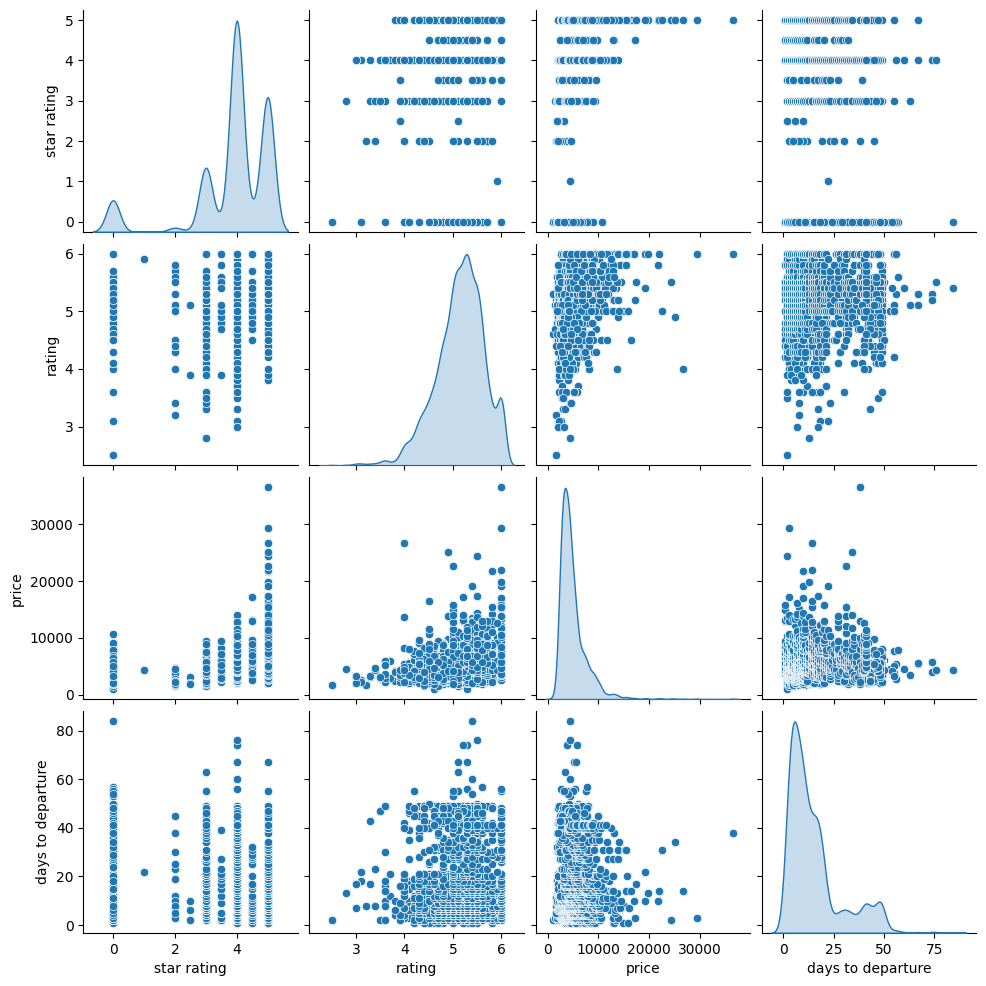

In [220]:
# Graph of relationships between features
import seaborn as sns

sns.pairplot(df_cleaned, diag_kind="kde");

In [221]:
# Outliers according to numerical features
px.box(df_cleaned, x = "price", title = "Feature spread - trips_price", orientation = "h")

In [222]:
# Outliers by numerical features
px.box(df_cleaned, x = "star rating", title = "Feature spread - hotel rating", orientation = "h")

In [223]:
# Outliers according to numerical features
px.box(df_cleaned, x = "rating", title = "Feature spread - trip evaluation", orientation = "h")

In [224]:
# Outliers according to numerical features
px.box(df_cleaned, x = "days to departure", title = "Feature spread - days to departure", orientation = "h")

In [225]:
# Calculate 1st and 3rd percentile for columns: 'price', 'rating', 'star rating' and 'days to departure'

def percentile(df, col):
	q1, q3 = np.percentile(df[col],[25,75])
	return q1, q3

print(f'The 1 and 3 percentile for price are:', (percentile(df_cleaned, "price")))
print(f'The 1 and 3 percentile for rating are:', (percentile(df_cleaned, "rating")))
print(f'The 1 and 3 percentile for star rating are:', (percentile(df_cleaned, "star rating")))
print(f'The 1 and 3 percentile for days to departure are:', (percentile(df_cleaned, "days to departure")))

The 1 and 3 percentile for price are: (np.float64(3199.0), np.float64(5659.0))
The 1 and 3 percentile for rating are: (np.float64(4.8), np.float64(5.5))
The 1 and 3 percentile for star rating are: (np.float64(4.0), np.float64(5.0))
The 1 and 3 percentile for days to departure are: (np.float64(6.0), np.float64(19.0))


In [226]:
# Determine outlier thersholds

def determine_outlier_thresholds_iqr(df, col, th1=0.25, th3=0.75):
    q1 = df[col].quantile(th1)
    q3 = df[col].quantile(th3)
    iqr = q3 - q1
    upper_limit = q3 + 1.5 * iqr
    lower_limit = q1 - 1.5 * iqr
    return lower_limit, upper_limit

lower_limit_price, upper_limit_price = determine_outlier_thresholds_iqr(df_cleaned, "price")
print(f'The outlier thresholds for price are:', (lower_limit_price, upper_limit_price))
lower_limit_rating, upper_limit_rating = determine_outlier_thresholds_iqr(df_cleaned, "rating")
print(f'The outlier thresholds for rating are:', (lower_limit_rating, upper_limit_rating))
lower_limit_star_rating, upper_limit_star_rating = determine_outlier_thresholds_iqr(df_cleaned, "star rating")
print(f'The outlier thresholds for star rating are:', (lower_limit_star_rating, upper_limit_star_rating))
lower_limit_days_to_departure, upper_limit_days_to_departure = determine_outlier_thresholds_iqr(df_cleaned, "days to departure")
print(f'The outlier thresholds for days to departure are:', (lower_limit_days_to_departure, upper_limit_days_to_departure))

The outlier thresholds for price are: (np.float64(-491.0), np.float64(9349.0))
The outlier thresholds for rating are: (np.float64(3.7499999999999996), np.float64(6.550000000000001))
The outlier thresholds for star rating are: (np.float64(2.5), np.float64(6.5))
The outlier thresholds for days to departure are: (np.float64(-13.5), np.float64(38.5))


In [227]:
# Print outliers for column "price"

def outliers(df, col, lower_limit, upper_limit):
  outlier = df[(df[col] < lower_limit) | (df[col] > upper_limit)]
  return outlier

print(f'Outlier for price column are:\n', (outliers(df_cleaned, "price", lower_limit_price, upper_limit_price)))

Outlier for price column are:
         source  star rating  rating     offer type    price trip length  \
124      ITAKA          5.0     4.9      Śniadania   9839.0           8   
380      ITAKA          5.0     5.5  All inclusive   9559.0           8   
384      ITAKA          5.0     5.6  All inclusive  10879.0           8   
388      ITAKA          5.0     5.6  All inclusive  10209.0           8   
390      ITAKA          5.0     5.1  All inclusive  10039.0           8   
...        ...          ...     ...            ...      ...         ...   
12508  Rainbow          5.0     6.0  All inclusive  10577.0          12   
12509  Rainbow          5.0     5.9  All inclusive  12559.0           8   
12526  Rainbow          4.0     5.3  All inclusive  10247.0          10   
12527  Rainbow          5.0     5.8  All inclusive  10958.0           8   
12528  Rainbow          5.0     5.3      Śniadania  11429.0           8   

       days to departure     country              city  
124        

In [228]:
# Print outliers for column "rating"

print(f'Outlier for rating column are:\n', (outliers(df_cleaned, "rating", lower_limit_rating, upper_limit_rating)))

Outlier for rating column are:
         source  star rating  rating                      offer type   price  \
12       ITAKA          0.0     2.5                       2 posiłki  1599.0   
25       ITAKA          0.0     3.1  Wyżywienie zgodnie z programem  2599.0   
136      ITAKA          4.0     3.7                   All inclusive  5899.0   
231      ITAKA          4.0     3.6                       Śniadania  2279.0   
281      ITAKA          4.0     3.7                   All inclusive  2899.0   
...        ...          ...     ...                             ...     ...   
11139  Rainbow          3.0     3.5                   All inclusive  3072.0   
11181  Rainbow          4.0     3.6                   All inclusive  5194.0   
11959  Rainbow          3.0     2.8                   All inclusive  4443.0   
11997  Rainbow          4.0     3.6                   All inclusive  5199.0   
12268  Rainbow          2.0     3.4                   All inclusive  4595.0   

      trip length  

In [229]:
# Print outliers for column "star rating"

print(f'Outlier for star rating column are:\n', (outliers(df_cleaned, "star rating", lower_limit_star_rating, upper_limit_star_rating)))

Outlier for star rating column are:
         source  star rating  rating      offer type   price trip length  \
5        ITAKA          0.0     5.3       Śniadania  2799.0           5   
12       ITAKA          0.0     2.5       2 posiłki  1599.0           8   
22       ITAKA          0.0     5.0       2 posiłki  2178.0           6   
23       ITAKA          0.0     5.0       Śniadania  2168.0           7   
24       ITAKA          0.0     4.3       2 posiłki  2299.0           8   
...        ...          ...     ...             ...     ...         ...   
12268  Rainbow          2.0     3.4   All inclusive  4595.0           9   
12291  Rainbow          2.0     5.5       Śniadania  4535.0           9   
12347  Rainbow          2.0     4.4  Bez wyżywienia  2429.0           8   
12465  Rainbow          2.0     5.0  Bez wyżywienia  1888.0           8   
12466  Rainbow          2.0     5.8  Bez wyżywienia  2140.0           8   

       days to departure    country           city  
5        

In [230]:
# Print outliers for column "days to departure"
print(f'Outlier for days to departure column are:\n', (outliers(df_cleaned, "days to departure", lower_limit_days_to_departure, upper_limit_days_to_departure)))

Outlier for days to departure column are:
         source  star rating  rating     offer type    price trip length  \
5        ITAKA          0.0     5.3      Śniadania   2799.0           5   
11       ITAKA          4.0     4.3      2 posiłki   2999.0           8   
13       ITAKA          4.0     5.1  All inclusive   3399.0           8   
19       ITAKA          3.0     4.2  All inclusive   2899.0           8   
21       ITAKA          3.0     4.7  All inclusive   3699.0           8   
...        ...          ...     ...            ...      ...         ...   
12522  Rainbow          4.0     5.7  All inclusive   8685.0           8   
12523  Rainbow          5.0     5.5      Śniadania   8830.0           9   
12526  Rainbow          4.0     5.3  All inclusive  10247.0          10   
12527  Rainbow          5.0     5.8  All inclusive  10958.0           8   
12528  Rainbow          5.0     5.3      Śniadania  11429.0           8   

       days to departure     country        city  
5    

In [231]:
# Create function for removing outliers

def remove_outliers(df, col, lower_limit, upper_limit):
  df_new = df[(df[col] > lower_limit) & (df[col] < upper_limit)]
  return df_new

In [232]:
# Remove outliers - column "price"

df_remove_1 = remove_outliers(df_cleaned, "price", lower_limit_price, upper_limit_price)
df_remove_1

,source,star rating,rating,offer type,price,trip length,days to departure,country,city
0,ITAKA,5.0,3.8,All inclusive,2299.0,5,4,Turcja,Kemer
1,ITAKA,4.0,4.7,All inclusive,2199.0,4,16,Bułgaria,Złote Piaski
4,ITAKA,5.0,5.0,All inclusive,2699.0,4,18,Albania,Durres
5,ITAKA,0.0,5.3,Śniadania,2799.0,5,43,Włochy,Włochy
6,ITAKA,5.0,5.1,All inclusive,4799.0,8,14,Grecja,Zakynthos
...,...,...,...,...,...,...,...,...,...
12519,Rainbow,4.0,5.6,2 posiłki,7834.0,8,41,Grecja,Korfu
12520,Rainbow,5.0,6.0,All inclusive,8402.0,8,41,Grecja,Kos
12521,Rainbow,4.0,5.0,2 posiłki,8647.0,10,41,Mauritius,Mauritius
12522,Rainbow,4.0,5.7,All inclusive,8685.0,8,41,Malta,Malta


In [233]:
# Remove outliers - column "rating"

df_remove_2 = remove_outliers(df_remove_1, "rating", lower_limit_rating, upper_limit_rating)
df_remove_2

,source,star rating,rating,offer type,price,trip length,days to departure,country,city
0,ITAKA,5.0,3.8,All inclusive,2299.0,5,4,Turcja,Kemer
1,ITAKA,4.0,4.7,All inclusive,2199.0,4,16,Bułgaria,Złote Piaski
4,ITAKA,5.0,5.0,All inclusive,2699.0,4,18,Albania,Durres
5,ITAKA,0.0,5.3,Śniadania,2799.0,5,43,Włochy,Włochy
6,ITAKA,5.0,5.1,All inclusive,4799.0,8,14,Grecja,Zakynthos
...,...,...,...,...,...,...,...,...,...
12519,Rainbow,4.0,5.6,2 posiłki,7834.0,8,41,Grecja,Korfu
12520,Rainbow,5.0,6.0,All inclusive,8402.0,8,41,Grecja,Kos
12521,Rainbow,4.0,5.0,2 posiłki,8647.0,10,41,Mauritius,Mauritius
12522,Rainbow,4.0,5.7,All inclusive,8685.0,8,41,Malta,Malta


In [234]:
# Remove outliers - column "star rating"

df_remove_3 = remove_outliers(df_remove_2, "star rating", lower_limit_star_rating, upper_limit_star_rating)
df_remove_3

,source,star rating,rating,offer type,price,trip length,days to departure,country,city
0,ITAKA,5.0,3.8,All inclusive,2299.0,5,4,Turcja,Kemer
1,ITAKA,4.0,4.7,All inclusive,2199.0,4,16,Bułgaria,Złote Piaski
4,ITAKA,5.0,5.0,All inclusive,2699.0,4,18,Albania,Durres
6,ITAKA,5.0,5.1,All inclusive,4799.0,8,14,Grecja,Zakynthos
8,ITAKA,4.0,5.2,Full board,2999.0,8,7,Włochy,Sycylia
...,...,...,...,...,...,...,...,...,...
12519,Rainbow,4.0,5.6,2 posiłki,7834.0,8,41,Grecja,Korfu
12520,Rainbow,5.0,6.0,All inclusive,8402.0,8,41,Grecja,Kos
12521,Rainbow,4.0,5.0,2 posiłki,8647.0,10,41,Mauritius,Mauritius
12522,Rainbow,4.0,5.7,All inclusive,8685.0,8,41,Malta,Malta


In [235]:
# Remove outliers - column "days to departure"

df_final = remove_outliers(df_remove_3, "days to departure", lower_limit_days_to_departure, upper_limit_days_to_departure)
df_final

,source,star rating,rating,offer type,price,trip length,days to departure,country,city
0,ITAKA,5.0,3.8,All inclusive,2299.0,5,4,Turcja,Kemer
1,ITAKA,4.0,4.7,All inclusive,2199.0,4,16,Bułgaria,Złote Piaski
4,ITAKA,5.0,5.0,All inclusive,2699.0,4,18,Albania,Durres
6,ITAKA,5.0,5.1,All inclusive,4799.0,8,14,Grecja,Zakynthos
8,ITAKA,4.0,5.2,Full board,2999.0,8,7,Włochy,Sycylia
...,...,...,...,...,...,...,...,...,...
12468,Rainbow,4.0,5.5,2 posiłki,3998.0,8,38,Grecja,Riwiera Olimpijska
12469,Rainbow,4.0,4.7,2 posiłki,5727.0,9,38,Grecja,Korfu
12470,Rainbow,3.0,5.3,Śniadania,5756.0,8,38,Grecja,Kreta - Chania
12471,Rainbow,4.0,6.0,All inclusive,5759.0,8,38,Turcja,Riwiera Turecka


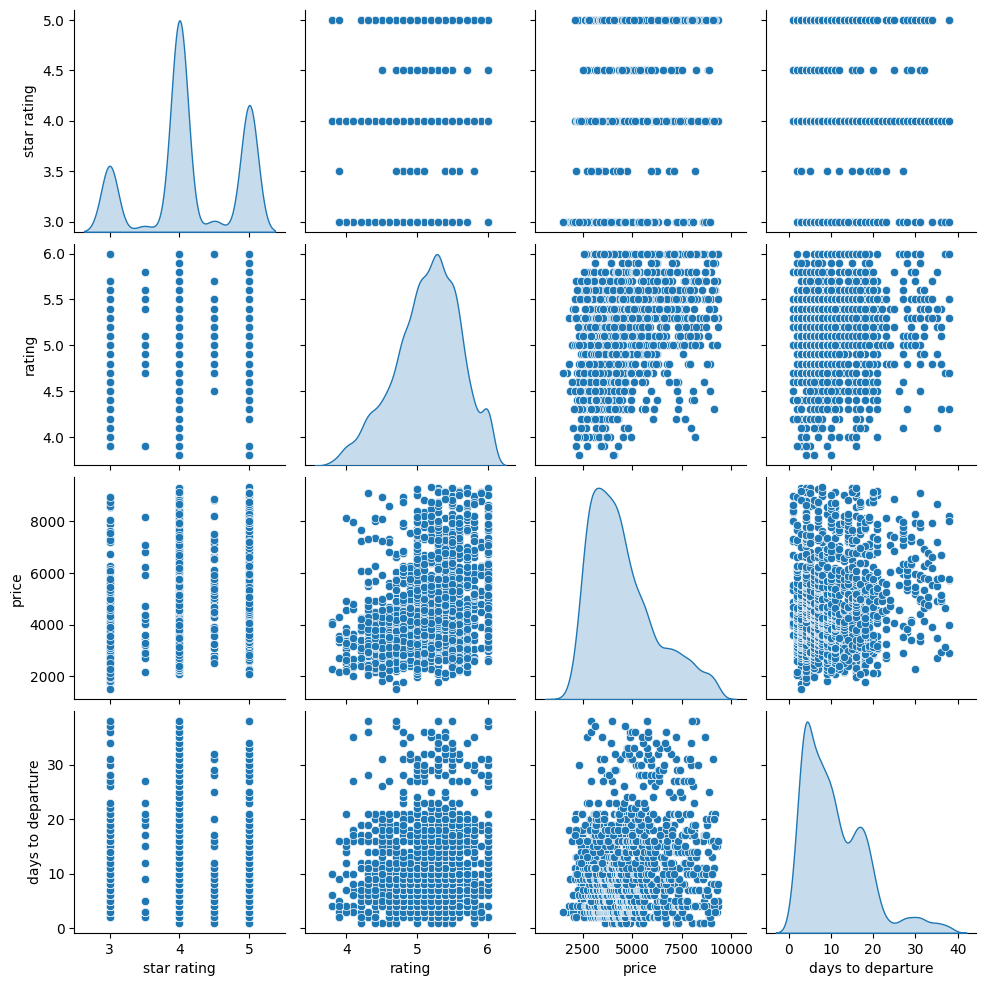

In [236]:
# Check relationships in a dataset (between columns in numeric format)

sns.pairplot(df_final, diag_kind="kde");

In [237]:
df_final['price'].describe()

,price
count,4874.000000
mean,4514.903775
std,1677.351279
min,1510.000000
25%,3199.000000
50%,4138.000000
75%,5443.000000
max,9318.000000


In [238]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4874 entries, 0 to 12472
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   source             4874 non-null   object 
 1   star rating        4874 non-null   float64
 2   rating             4874 non-null   float64
 3   offer type         4874 non-null   object 
 4   price              4874 non-null   float64
 5   trip length        4874 non-null   object 
 6   days to departure  4874 non-null   int64  
 7   country            4874 non-null   object 
 8   city               4874 non-null   object 
dtypes: float64(3), int64(1), object(5)
memory usage: 380.8+ KB


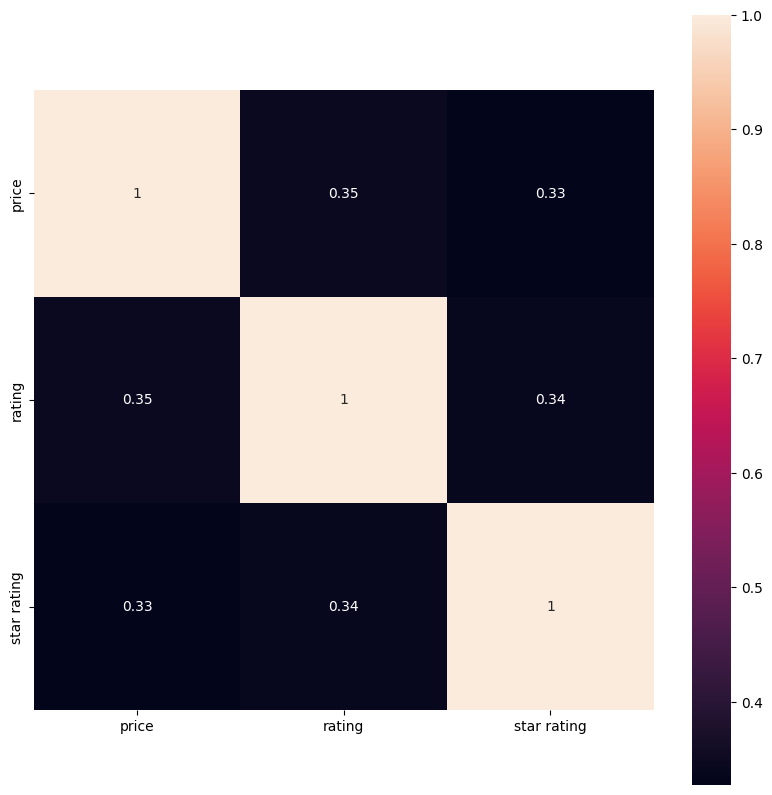

In [239]:
# Checking the correlation between variables

import matplotlib
import matplotlib.pyplot as plt

df_temp = df_final[["price", "rating", "star rating"]]
korelacja = df_temp.corr()
f, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(korelacja, square = True, annot = True);

In [240]:
# Final analysis

{
    "Number of downloaded offers": df_final.shape[0],
    "Number of unique countries": df_final["country"].nunique(),
    "Number of unique cities": df_final["city"].nunique(),
    "Average hotel rating": df_final["star rating"].mean(),
    "Average offer rating": df_final["rating"].mean(),
    "Average price": df_final["price"].mean(),
    "Minimum price": df_final["price"].min(),
    "Maximum price": df_final["price"].max()
}

{'Number of downloaded offers': 4874,
 'Number of unique countries': 34,
 'Number of unique cities': 134,
 'Average hotel rating': np.float64(4.15049240869922),
 'Average offer rating': np.float64(5.1484612228149365),
 'Average price': np.float64(4514.903775133361),
 'Minimum price': 1510.0,
 'Maximum price': 9318.0}

In [241]:
pip install feature-engine

In [242]:
pip install --upgrade category_encoders

In [243]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from feature_engine.encoding import MeanEncoder

df_final["trip length"] = pd.to_numeric(df_final["trip length"], errors="raise")

# Split dataset into train and test set

X = df_final.drop('price', axis=1)
y = df_final['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

/tmp/ipython-input-243-1378008958.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [244]:
print(X_train.head())

        source  star rating  rating     offer type  trip length  \
7714   Rainbow          4.0     5.2  All inclusive            9   
7655   Rainbow          3.0     5.7  All inclusive            8   
8096   Rainbow          3.0     5.3      3 posiłki            9   
11516  Rainbow          4.0     4.7  All inclusive            8   
11235  Rainbow          3.0     5.0      2 posiłki            8   

       days to departure    country                              city  
7714                  11    Tunezja                            Djerba  
7655                  10     Grecja                    Kreta - Chania  
8096                  23  Chorwacja                  Makarska Riwiera  
11516                  6     Turcja                   Riwiera Turecka  
11235                  3  Hiszpania   Costa Brava - Costa del Maresme  


In [245]:
X_train

,source,star rating,rating,offer type,trip length,days to departure,country,city
7714,Rainbow,4.0,5.2,All inclusive,9,11,Tunezja,Djerba
7655,Rainbow,3.0,5.7,All inclusive,8,10,Grecja,Kreta - Chania
8096,Rainbow,3.0,5.3,3 posiłki,9,23,Chorwacja,Makarska Riwiera
11516,Rainbow,4.0,4.7,All inclusive,8,6,Turcja,Riwiera Turecka
11235,Rainbow,3.0,5.0,2 posiłki,8,3,Hiszpania,Costa Brava - Costa del Maresme
...,...,...,...,...,...,...,...,...
11584,Rainbow,5.0,4.8,All inclusive,5,7,Turcja,Riwiera Egejska
1656,ITAKA,4.0,4.7,Śniadania,4,16,Chorwacja,Dalmacja
7992,Rainbow,4.0,5.5,Śniadania,9,19,Hiszpania,Gran Canaria
10133,ITAKA,5.0,5.5,Śniadania,7,18,Tajlandia,Pattaya


In [246]:
X_test

,source,star rating,rating,offer type,trip length,days to departure,country,city
7230,Rainbow,5.0,5.8,All inclusive,5,4,Egipt,Hurghada
10396,ITAKA,5.0,5.0,All inclusive,6,19,Turcja,Alanya
9359,ITAKA,4.0,4.6,All inclusive,8,8,Zanzibar,Zanzibar
2305,ITAKA,4.0,5.3,2 posiłki,8,9,Wyspy Kanaryjskie,Gran Canaria
8867,ITAKA,4.0,5.6,Śniadania,4,6,Portugalia,Porto
...,...,...,...,...,...,...,...,...
7707,Rainbow,3.0,5.1,Bez wyżywienia,9,11,Hiszpania,Teneryfa
3819,Rainbow,5.0,5.6,All inclusive,8,19,Maroko,Agadir
8865,ITAKA,3.0,5.2,Bez wyżywienia,4,6,Portugalia,Porto
2169,ITAKA,4.0,5.4,Śniadania,4,11,Hiszpania,Costa del Sol


In [247]:
# Replace the categories in categorical features by the mean value of the target variable shown by each category

encoder = MeanEncoder(
    variables=["source", "country", "city", "offer type"],
    smoothing="auto",
    missing_values='ignore'
)

In [248]:
encoder.fit(X_train, y_train)

MeanEncoder(missing_values='ignore', smoothing='auto',
            variables=['source', 'country', 'city', 'offer type'])

In [249]:
encoder.encoder_dict_

{'source': {'ITAKA': 3956.1188823040134, 'Rainbow': 5102.3785789588765},
 'country': {'Albania': 3201.023602916258,
  'Bułgaria': 3549.744043713431,
  'Chorwacja': 4117.85690103679,
  'Cypr': 4102.659976594404,
  'Cypr i Cypr Północny': 6445.218244711523,
  'Czarnogóra': 4348.536168616936,
  'Dominikana': 9118.102476067286,
  'Egipt': 4210.594667393575,
  'Francja': 3711.531655262416,
  'Grecja': 4411.060299987405,
  'Gruzja': 3911.1474549247373,
  'Hiszpania': 4934.262064511967,
  'Indonezja': 8157.0,
  'Katar': 3794.139367005574,
  'Kenia': 6559.795653774809,
  'Macedonia': 3493.496010646059,
  'Madagaskar': 7068.095113332985,
  'Madera': 4517.579006029432,
  'Malediwy': 7377.240177518817,
  'Malta': 2941.813410966882,
  'Maroko': 5959.2156827137205,
  'Mauritius': 8449.365263032127,
  'Meksyk': 8368.477904274776,
  'Portugalia': 4761.887590336077,
  'Seszele': 7309.0,
  'Sri Lanka': 6837.613006028064,
  'Tajlandia': 6724.282743267738,
  'Tunezja': 3883.108187222413,
  'Turcja': 4521

In [250]:
# Apply encoder

train_t = encoder.transform(X_train)
test_t = encoder.transform(X_test)

print(train_t.head())

            source  star rating  rating   offer type  trip length  \
7714   5102.378579          4.0     5.2  4538.197507            9   
7655   5102.378579          3.0     5.7  4538.197507            8   
8096   5102.378579          3.0     5.3  5862.188639            9   
11516  5102.378579          4.0     4.7  4538.197507            8   
11235  5102.378579          3.0     5.0  4927.081433            8   

       days to departure      country         city  
7714                  11  3883.108187  3937.816402  
7655                  10  4411.060300  5690.273152  
8096                  23  4117.856901  4076.430464  
11516                  6  4521.337352  5401.639609  
11235                  3  4934.262065  4715.278882  


In [251]:
# Get a boolean DataFrame showing NaNs
nan_locations = test_t.isna()

# Get rows with any NaNs
rows_with_nans = test_t[nan_locations.any(axis=1)]

In [252]:
rows_with_nans

,source,star rating,rating,offer type,trip length,days to departure,country,city


In [253]:
# Find rows in test_t that do NOT have any NaNs
mask = test_t.notna().all(axis=1)

# Apply the mask to both test_t and y_test
test_t = test_t[mask]
y_test = y_test[mask]

In [254]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

# Standardize features by removing the mean and scaling to unit variance

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(train_t)
X_test_scaled = scaler.transform(test_t)

# Preparation of the Linear Regression model

model_rl = LinearRegression()
model_rl.fit(X_train_scaled, y_train)

LinearRegression()

In [255]:
from sklearn.metrics import mean_squared_error, r2_score

price_y_pred = model_rl.predict(X_test_scaled)
# The coefficients
print("Coefficients: \n", model_rl.coef_)

# # The mean squared error
print("Mean squared error LinearRegression: %.2f" % mean_squared_error(y_test, price_y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination LinearRegression: %.2f" % r2_score(y_test, price_y_pred))

Coefficients: 
 [-69.14822725 384.21353143 283.13159097  43.09734338 295.85472602
 255.64502449  77.95431309 980.17036238]
Mean squared error LinearRegression: 996473.99
Coefficient of determination LinearRegression: 0.62


In [256]:
import pickle

# Save the trained model as a pickle string
saved_LinearRegression = pickle.dumps(model_rl)

In [257]:
from sklearn.ensemble import RandomForestRegressor

# Preparation of the RandomForestRegressor model

model_rfr = RandomForestRegressor()
model_rfr.fit(X_train_scaled, y_train)

price_y_pred = model_rfr.predict(X_test_scaled)

# # The mean squared error
print("Mean squared error RandomForestRegressor: %.2f" % mean_squared_error(y_test, price_y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination RandomForestRegressor: %.2f" % r2_score(y_test, price_y_pred))

Mean squared error RandomForestRegressor: 175632.79
Coefficient of determination RandomForestRegressor: 0.93


In [258]:
# Save the trained model as a pickle string
saved_RandomForestRegressor = pickle.dumps(model_rfr)

Feature: source, Score: 0.00406
Feature: star rating, Score: 0.08403
Feature: rating, Score: 0.11098
Feature: offer type, Score: 0.03031
Feature: trip length, Score: 0.05647
Feature: days to departure, Score: 0.10446
Feature: country, Score: 0.03856
Feature: city, Score: 0.57112


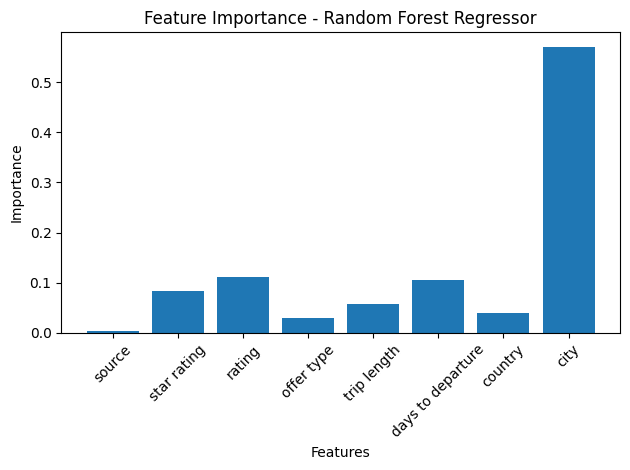

In [259]:
# Get importance
importance = model_rfr.feature_importances_

feature_names = ["source", "star rating", "rating", "offer type", "trip length", "days to departure", "country", "city"]

for i, v in enumerate(importance):
    print('Feature: %s, Score: %.5f' % (feature_names[i], v))

# Bar chart
plt.bar(range(len(importance)), importance)
plt.xticks(ticks=range(len(importance)), labels=feature_names, rotation=45)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance - Random Forest Regressor')
plt.tight_layout()
plt.show()

In [260]:
from xgboost import XGBRegressor

# Preparation of the XGBRegressor model
model_xgb = XGBRegressor()
model_xgb.fit(X_train_scaled, y_train)

price_y_pred = model_xgb.predict(X_test_scaled)

# # The mean squared error
print("Mean squared error XGBRegressor: %.2f" % mean_squared_error(y_test, price_y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination XGBRegressor: %.2f" % r2_score(y_test, price_y_pred))

Mean squared error XGBRegressor: 203038.82
Coefficient of determination XGBRegressor: 0.92


In [261]:
# Save the trained model as a pickle string
saved_XGBRegressor = pickle.dumps(model_xgb)

Feature: source, Score: 0.02618
Feature: star rating, Score: 0.13780
Feature: rating, Score: 0.05516
Feature: offer type, Score: 0.05692
Feature: trip length, Score: 0.10896
Feature: days to departure, Score: 0.07386
Feature: country, Score: 0.06958
Feature: city, Score: 0.47154


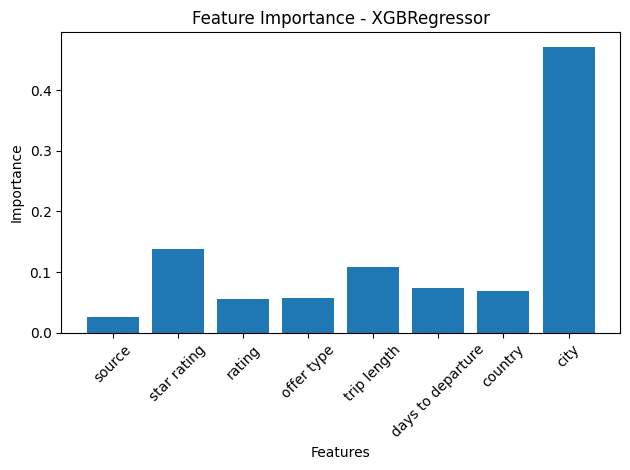

In [262]:
# get importance
importance_xgb = model_xgb.feature_importances_

feature_names = ["source", "star rating", "rating", "offer type", "trip length", "days to departure", "country", "city"]

for i, v in enumerate(importance_xgb):
    print('Feature: %s, Score: %.5f' % (feature_names[i], v))

# Bar chart
plt.bar(range(len(importance_xgb)), importance_xgb)
plt.xticks(ticks=range(len(importance_xgb)), labels=feature_names, rotation=45)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance - XGBRegressor')
plt.tight_layout()
plt.show()

In [263]:
from sklearn.model_selection import RandomizedSearchCV

# Use RandomizedSearchCV for optimizing the hyperparameters of a machine learning model
param_rand = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 3, 4, 5],
    'min_samples_leaf': [1, 2],
    'bootstrap': [True, False]
}

random_search = RandomizedSearchCV(RandomForestRegressor(),
                                   param_rand)
random_search.fit(X_train_scaled, y_train)
print(random_search.best_estimator_)

RandomForestRegressor(bootstrap=False, max_depth=20, n_estimators=50)


In [264]:
# Apply parameters from RandomizedSearchCV

model_rfr_rand = RandomForestRegressor(n_estimators=200,
                                       min_samples_split=3)
model_rfr_rand.fit(X_train_scaled, y_train)

price_y_pred = model_rfr_rand.predict(X_test_scaled)
# # The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, price_y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test, price_y_pred))

Mean squared error: 183775.96
Coefficient of determination: 0.93


In [265]:
# Drop column "source" which were less important - on feature importance graph

X_new = df_final.drop(['price', 'source'], axis=1)
y_new = df_final['price']
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X_new, y_new, test_size=0.2, random_state=42)

In [266]:
encoder_new = MeanEncoder(
    variables=["country", "city", "offer type"],
    smoothing="auto"
)

In [267]:
encoder_new.fit(X_train_new, y_train_new)
train_t_new = encoder_new.transform(X_train_new)
test_t_new = encoder_new.transform(X_test_new)

In [268]:
scaler_new = StandardScaler()
X_train_scaled_new = scaler_new.fit_transform(train_t_new)
X_test_scaled_new = scaler_new.transform(test_t_new)

In [269]:
# Define the new version of model

model_rfr_new = RandomForestRegressor()
model_rfr_new.fit(X_train_scaled_new, y_train_new)

price_y_pred_new = model_rfr_new.predict(X_test_scaled_new)

# The mean squared error
print("Mean squared error for RandomForestRegressor without two features: %.2f" % mean_squared_error(y_test_new, price_y_pred_new))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination for RandomForestRegressor without two features : %.2f" % r2_score(y_test_new, price_y_pred_new))

Mean squared error for RandomForestRegressor without two features: 177237.45
Coefficient of determination for RandomForestRegressor without two features : 0.93


In [270]:
# Save the trained model as a pickle string
saved_RandomForestRegressor_new = pickle.dumps(model_rfr_new)

In [271]:
# Define the new version of model

model_xgb_new = XGBRegressor()
model_xgb_new.fit(X_train_scaled_new, y_train_new)

price_y_pred_new = model_xgb_new.predict(X_test_scaled_new)

# The mean squared error
print("Mean squared error for XGBRegressor without two features: %.2f" % mean_squared_error(y_test_new, price_y_pred_new))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination for XGBRegressor without two features: %.2f" % r2_score(y_test_new, price_y_pred_new))

Mean squared error for XGBRegressor without two features: 206536.84
Coefficient of determination for XGBRegressor without two features: 0.92


In [272]:
# Save the trained model as a pickle string
saved_XGBRegressor_new = pickle.dumps(model_xgb_new)